In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import HTML
import matplotlib.animation as animation
import plotly.graph_objects as pl
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, BatchNormalization, Dropout, Activation, Conv1D, Conv2D, MaxPooling2D, Flatten, LSTM, GlobalAveragePooling1D, Bidirectional, SpatialDropout1D, SimpleRNN, Reshape, concatenate, MaxPooling1D
from tensorflow.keras.layers import LeakyReLU
from keras.initializers import random_uniform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('dataset.csv',low_memory=False)

In [3]:
dataset.head()

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label,activity
0,35.203.211.133_54573_10.0.4.57_25094_TCP_2023-...,2023-12-14 09:01:03.508091,35.203.211.133,54573,10.0.4.57,25094,TCP,6.29425048828125e-05,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Benign,Benign
1,10.0.4.57_25094_35.203.211.133_54573_TCP_2023-...,2023-12-14 09:01:03.508156,10.0.4.57,25094,35.203.211.133,54573,TCP,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,35.203.211.133_54573_10.0.4.57_25094_TCP_2023-...,2023-12-14 09:01:03.508431,35.203.211.133,54573,10.0.4.57,25094,TCP,2.813339233398437e-05,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,162.142.125.181_9147_10.0.4.57_18060_TCP_2023-...,2023-12-14 09:01:06.696817,162.142.125.181,9147,10.0.4.57,18060,TCP,5.507469177246094e-05,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Benign,Benign
4,10.0.4.57_18060_162.142.125.181_9147_TCP_2023-...,2023-12-14 09:01:06.696874,10.0.4.57,18060,162.142.125.181,9147,TCP,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [4]:
dataset.columns

Index(['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port',
       'protocol', 'duration', 'packets_count', 'fwd_packets_count',
       ...
       'max_fwd_payload_bytes_delta_len', 'mean_fwd_payload_bytes_delta_len',
       'mode_fwd_payload_bytes_delta_len',
       'variance_fwd_payload_bytes_delta_len',
       'std_fwd_payload_bytes_delta_len', 'median_fwd_payload_bytes_delta_len',
       'skewness_fwd_payload_bytes_delta_len',
       'cov_fwd_payload_bytes_delta_len', 'label', 'activity'],
      dtype='object', length=324)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700776 entries, 0 to 700775
Columns: 324 entries, flow_id to activity
dtypes: object(324)
memory usage: 1.7+ GB


In [6]:
dataset.describe()

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,fwd_packets_count,...,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label,activity
count,700776,700774,700776,700776,700776,700776,700776,700776,700776,700776,...,700776,700776,700776,700776,700776,700776,620038,620626,700776,700776
unique,699995,695034,11345,57933,5091,65536,2,174388,1736,1303,...,1150,1196,452,14734,14702,320,7045,3521,4,27
top,10.0.3.52_50367_172.64.80.1_443_TCP_2023-12-19...,2023-12-19 10:50:08.590068,130.63.226.46,42048,10.0.6.142,3389,TCP,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
freq,6,6,131094,101469,141753,77932,700774,330497,330255,395877,...,541313,691543,596132,541727,541727,601535,466314,461195,413199,302284


In [7]:
label_mapping = {
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 2
}

In [8]:
dataset['label'] = dataset['label'].apply(lambda x: label_mapping.get(x, 2))
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset.replace([np.inf,-np.inf], np.nan, inplace=True)
dataset.replace(np.nan, 0, inplace=True)
columns_to_drop = [col for col in dataset.columns if dataset[col].eq(0).all()]
dataset.drop(columns=columns_to_drop, inplace=True)

In [9]:
dataset.head()

,src_port,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,min_fwd_payload_bytes_delta_len,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label
0,54573.0,25094.0,0.000063,3.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,25094.0,54573.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,54573.0,25094.0,0.000028,3.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9147.0,18060.0,0.000055,3.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,18060.0,9147.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
dataset.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)

,label
0,413199
1,228469
2,59108


In [11]:
labels = dataset['label']

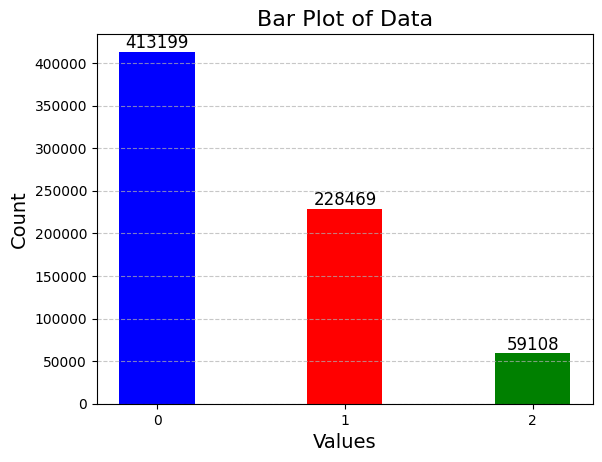

In [12]:
value_counts = labels.value_counts()
plt.bar(value_counts.index, value_counts.values, color=['blue', 'red', 'green'], width=0.4)
plt.title('Bar Plot of Data', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)
plt.xticks(value_counts.index, ['0', '1', '2'])
plt.show()

In [13]:
corr = dataset.corr()

In [14]:
def get_abs_correlations(df, t):
    labels_to_drop = set()
    cols = corr.columns
    for i in range(0, corr.shape[1]):
        for j in range(0, i+1):
            labels_to_drop.add((cols[i], cols[j]))
    c = corr.unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    c = c[c >= t]  # Filter correlations above or equal to threshold t
    unique_features = set([feature for pair in c.index for feature in pair])
    return list(unique_features)[:100]  # Return top 100 unique features
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    col_kept = get_abs_correlations(dataset, 0.9)

In [15]:
col_kept

['fwd_psh_flag_percentage_in_total',
 'fwd_payload_bytes_variance',
 'mode_fwd_packets_delta_len',
 'variance_packets_delta_time',
 'urg_flag_percentage_in_total',
 'bwd_syn_flag_percentage_in_total',
 'mode_fwd_payload_bytes_delta_len',
 'ack_flag_counts',
 'idle_mean',
 'bwd_packets_IAT_max',
 'bwd_variance_header_bytes',
 'bwd_psh_flag_percentage_in_bwd_packets',
 'fwd_payload_bytes_skewness',
 'payload_bytes_min',
 'mean_header_bytes_delta_len',
 'median_bwd_packets_delta_time',
 'bwd_ece_flag_counts',
 'bwd_payload_bytes_mean',
 'bwd_bulk_state_count',
 'variance_bwd_packets_delta_time',
 'median_payload_bytes_delta_len',
 'avg_bwd_bytes_per_bulk',
 'max_packets_delta_len',
 'median_header_bytes',
 'bwd_syn_flag_percentage_in_bwd_packets',
 'active_std',
 'max_fwd_packets_delta_time',
 'fwd_fin_flag_percentage_in_fwd_packets',
 'fwd_bulk_total_size',
 'payload_bytes_max',
 'packets_IAT_median',
 'mean_fwd_packets_delta_time',
 'fwd_packets_IAT_skewness',
 'fwd_rst_flag_percentage_

In [16]:
dataset = dataset[col_kept]

In [17]:
features = dataset.loc[:, dataset.columns != 'label'].astype('float64')

In [18]:
features.head()

,fwd_psh_flag_percentage_in_total,fwd_payload_bytes_variance,mode_fwd_packets_delta_len,variance_packets_delta_time,urg_flag_percentage_in_total,bwd_syn_flag_percentage_in_total,mode_fwd_payload_bytes_delta_len,ack_flag_counts,idle_mean,bwd_packets_IAT_max,...,bwd_mean_header_bytes,fwd_bulk_per_packet,fwd_packets_IAT_min,payload_bytes_skewness,skewness_packets_delta_time,packets_count,active_min,active_mean,mean_fwd_packets_delta_len,variance_bwd_header_bytes_delta_len
0,0.0,0.0,0.0,0.0003,0.0,0.000000,0.0,1.0,0.0,1.702562e+09,...,20.0,0.0,1.502037e-05,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,1.0,0.0,1.702562e+09,...,20.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0000,0.0,0.333333,0.0,1.0,0.0,2.813339e-05,...,22.0,0.0,1.702562e+09,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0001,0.0,0.000000,0.0,1.0,0.0,1.702562e+09,...,20.0,0.0,1.811981e-05,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,1.0,0.0,1.702562e+09,...,20.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [20]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(labels)
labels = LE.transform(labels)

In [21]:
np.unique(labels)

array([0, 1, 2])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2,random_state=1)
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape

((560620, 100), (560620,), (140156, 100), (140156,))

In [24]:
features_train,  features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=1)
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape, features_val.shape ,labels_val.shape

((420465, 100), (420465,), (140156, 100), (140156,), (140155, 100), (140155,))

In [25]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [26]:
# this function has evaluation metrics
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.4f} %'.format(precision_score(y_true, prediction, average='weighted') * 100))
    print('Recall-score: {:,.4f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.4f}'.format(f1_score(y_true, prediction, average='weighted') * 100))

In [27]:
def plotgraphs(model):
    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["accuracy"], 'o-')
    ax.plot([None] + model.history.history["val_accuracy"], 'x-')

    ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
    ax.set_title('Training/Val Accuracy Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')
    plt.show()

    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["loss"], 'o-')
    ax.plot([None] + model.history.history["val_loss"], 'x-')

    ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
    ax.set_title('Training/Val Losses Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()

In [57]:
y_train= to_categorical(labels_train)
y_test= to_categorical(labels_test)
y_val= to_categorical(labels_val)

X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)

In [69]:
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)

model = Sequential()
model.add(Conv1D(128, 3, input_shape=(100, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(SimpleRNN(units = 128,activation='relu', return_sequences = True))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Conv1D(128, 1))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(SimpleRNN(units = 128,activation='relu', return_sequences = True))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Conv1D(64, 1))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(SimpleRNN(units = 64,activation='relu', return_sequences = True))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Conv1D(64, 1))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(SimpleRNN(units = 64,activation='relu', return_sequences = True))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, input_dim=2, kernel_initializer=hidden_initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 98, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 49, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 49, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 24, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 24, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 12, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 12, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 64)          │             

 Total params: 125,219 (489.14 KB)

 Trainable params: 125,219 (489.14 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=256,
         validation_data=(X_val,y_val))

Epoch 1/30
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 130s 77ms/step - accuracy: 0.8138 - loss: 0.4860 - val_accuracy: 0.8976 - val_loss: 0.3179
Epoch 2/30
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 125s 76ms/step - accuracy: 0.8931 - loss: 0.3202 - val_accuracy: 0.8984 - val_loss: 0.3018
Epoch 3/30
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 125s 76ms/step - accuracy: 0.8975 - loss: 0.3045 - val_accuracy: 0.9006 - val_loss: 0.3020
Epoch 4/30
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 125s 76ms/step - accuracy: 0.8988 - loss: 0.3002 - val_accuracy: 0.9021 - val_loss: 0.2893
Epoch 5/30
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 125s 76ms/step - accuracy: 0.8982 - loss: 0.2996 - val_accuracy: 0.9008 - val_loss: 0.2900
Epoch 6/30
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 125s 76ms/step - accuracy: 0.9003 - loss: 0.2949 - val_accuracy: 0.9028 - val_loss: 0.2853

In [76]:
predictions = np.argmax(model.predict(features_test), axis=1)

4380/4380 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step


In [78]:
report(predictions,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     82212
           1       0.90      0.88      0.89     46205
           2       0.89      0.36      0.52     11739

    accuracy                           0.90    140156
   macro avg       0.90      0.74      0.78    140156
weighted avg       0.90      0.90      0.89    140156


        ----------Validation Data------------------
Accuarcy: 90.26798710008848
Precision: 90.2022 %
Recall-score: 90.2680
F1-score: 89.1735


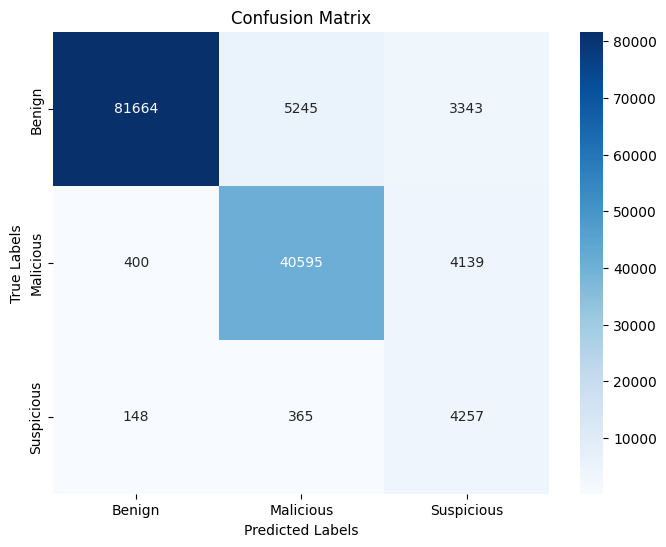

In [80]:
cm = confusion_matrix(predictions,labels_test)
class_names = ['Benign', 'Malicious', 'Suspicious']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
colors = ['blue', 'green', 'red']
predictions_prob = model.predict(features_test)

4380/4380 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step


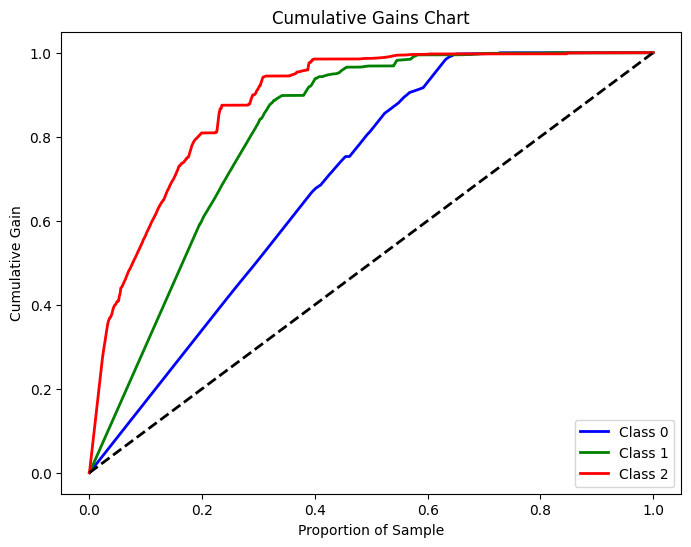

In [97]:
def cumulative_gains(y_true, y_probs, pos_label=1):
    y_true = (y_true == pos_label).astype(int)
    order = np.argsort(y_probs)[::-1]
    y_true = y_true[order]
    gains = np.cumsum(y_true) / np.sum(y_true)
    return np.arange(1, len(y_true) + 1) / len(y_true), gains

plt.figure(figsize=(8, 6))
for class_id, color in enumerate(colors):
    proportions, gains = cumulative_gains(labels_test, predictions_prob[:, class_id], pos_label=class_id)
    plt.plot(proportions, gains, color=color, lw=2, label=f'Class {class_id}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Proportion of Sample')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gains Chart')
plt.legend(loc='lower right')
plt.show()

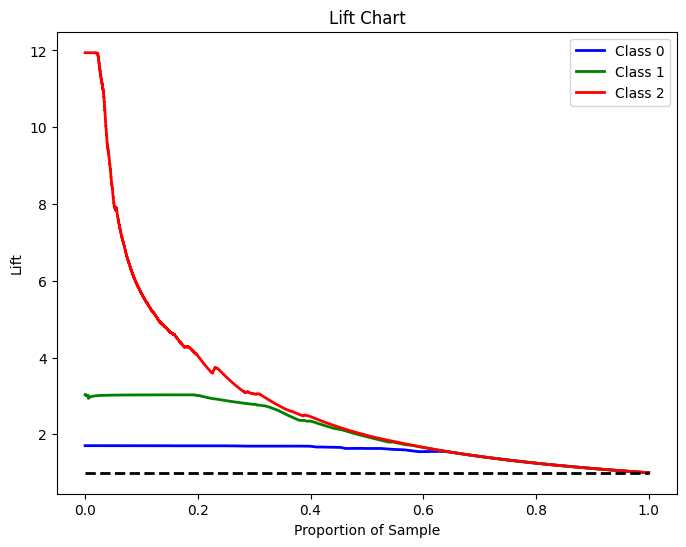

In [98]:
plt.figure(figsize=(8, 6))
for class_id, color in enumerate(colors):
    proportions, gains = cumulative_gains(labels_test, predictions_prob[:, class_id], pos_label=class_id)
    lift = gains / proportions
    plt.plot(proportions, lift, color=color, lw=2, label=f'Class {class_id}')

plt.plot([0, 1], [1, 1], 'k--', lw=2)
plt.xlabel('Proportion of Sample')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc='upper right')
plt.show()